# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [2]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-10-02 03:36:55--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-10-02 03:36:56--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [6]:
countryquantity= data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5).reset_index()
countryquantity

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480


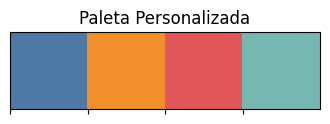

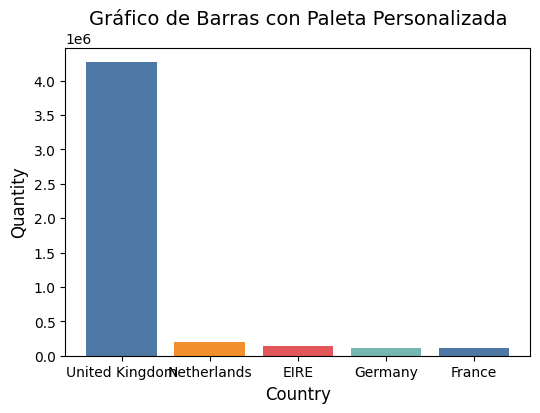

In [7]:
# Definir una paleta personalizada
custom_palette = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']

# Visualizar la paleta
sns.palplot(custom_palette)
plt.title('Paleta Personalizada', fontsize=12)
plt.show()

# Aplicar la paleta en un barplot
plt.figure(figsize=(6,4))
plt.bar(countryquantity['Country'], countryquantity['Quantity'], color=custom_palette)
plt.title('Gráfico de Barras con Paleta Personalizada', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

In [8]:
data.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head()

,UnitPrice
Country,
Singapore,109.645808
Hong Kong,42.505208
Portugal,8.582976
Cyprus,6.302363
Canada,6.030331


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [9]:
data.groupby('StockCode')['Quantity'].value_counts().sort_values(ascending=False).head(10)

,,count
StockCode,Quantity,
85099B,10,724
DOT,1,708
20725,10,632
84879,8,610
22423,1,604
21212,24,583
22720,3,572
85123A,6,560
23203,10,552


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [10]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
data.groupby('InvoiceNo')['TotalPrice'].sum()

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
C581484,-168469.60
C581490,-32.53
C581499,-224.69


In [ ]:
# This cell is now empty as the code was moved to the previous cell.

The average invoice total is: 376.36


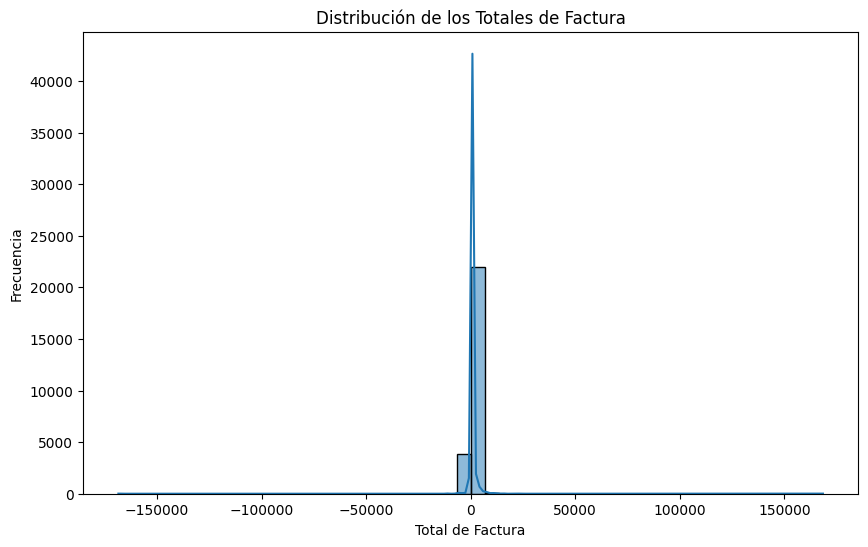

In [12]:
invoice_totals = data.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

average_invoice_total = invoice_totals['TotalPrice'].mean()
print(f"The average invoice total is: {average_invoice_total:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(invoice_totals['TotalPrice'], bins=50, kde=True)
plt.title('Distribución de los Totales de Factura')
plt.xlabel('Total de Factura')
plt.ylabel('Frecuencia')
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [21]:
data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

,TotalPrice
InvoiceDate,
2010-12,748957.020
2011-01,560000.260
2011-02,498062.650
2011-03,683267.080
2011-04,493207.121
2011-05,723333.510
2011-06,691123.120
2011-07,681300.111
2011-08,682680.510


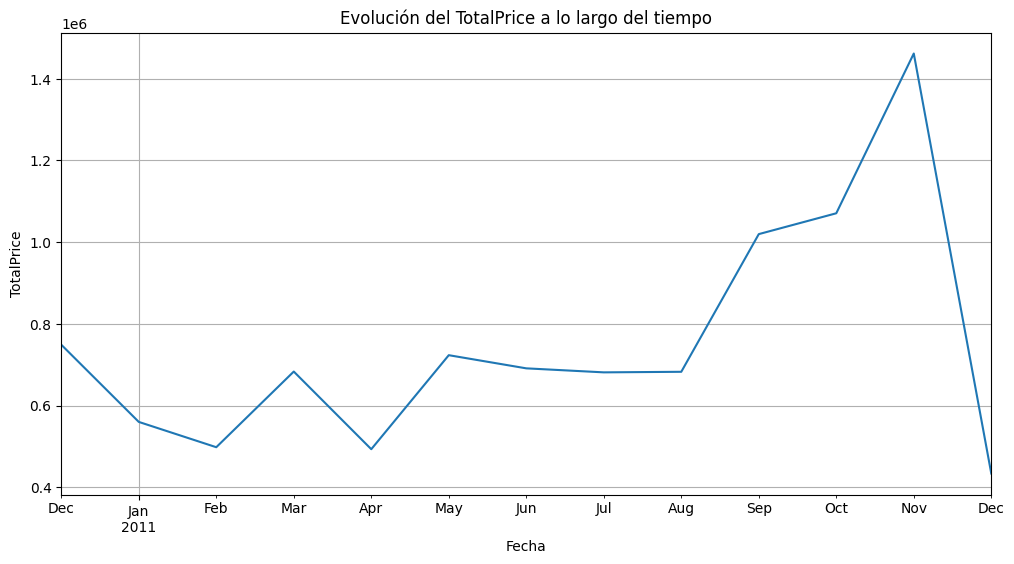

In [23]:
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Evolución del TotalPrice a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('TotalPrice')
plt.grid(True)
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [24]:
data.groupby('Country')['UnitPrice'].mean()

,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.556316
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


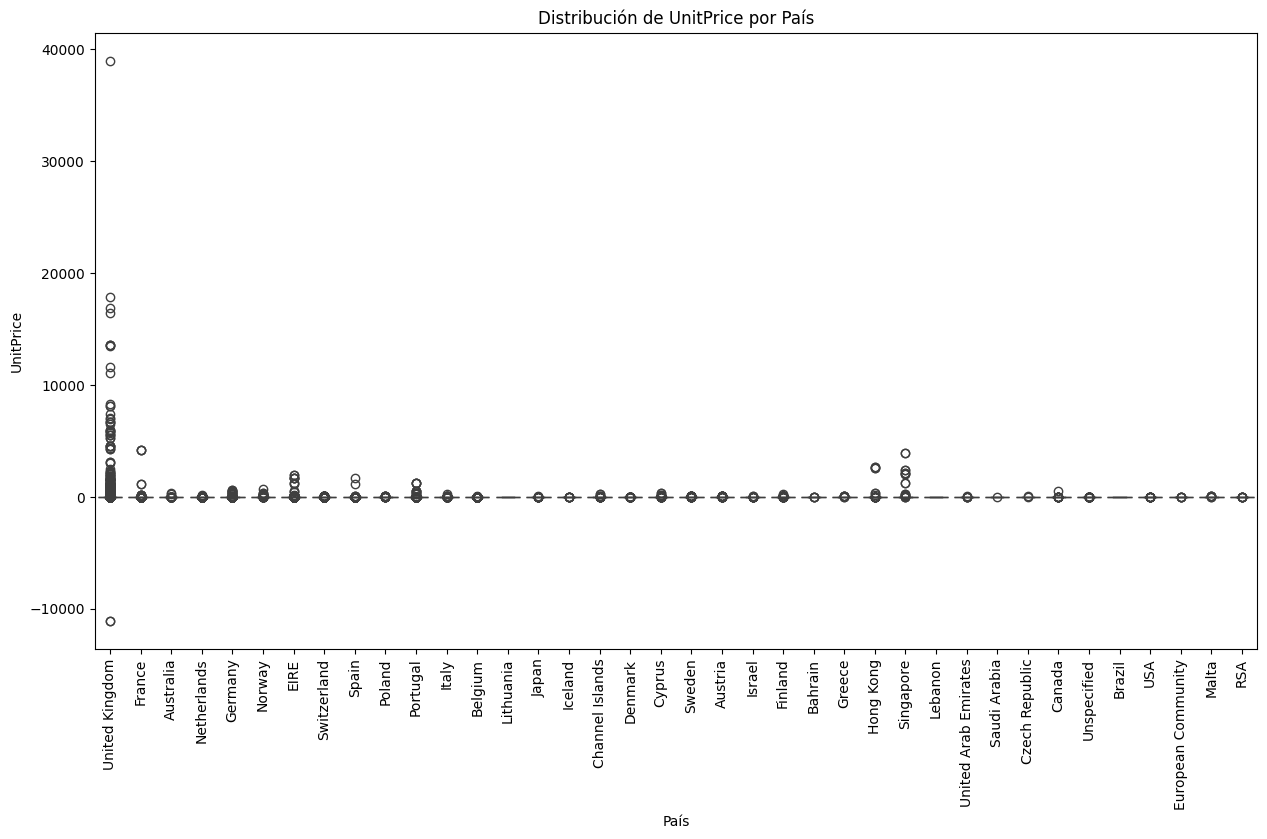

In [25]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.title('Distribución de UnitPrice por País')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

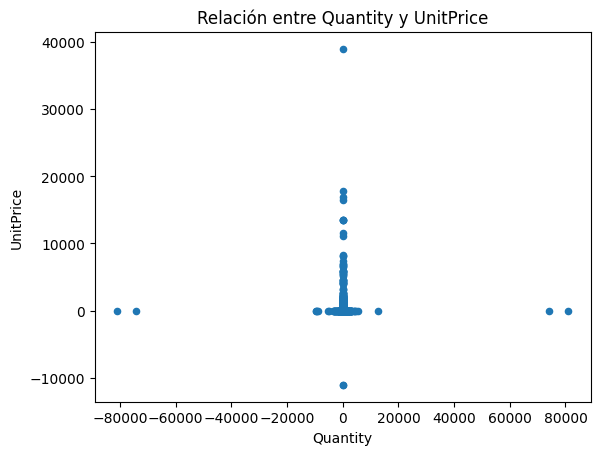

In [26]:
data.plot.scatter(x='Quantity', y='UnitPrice')
plt.title('Relación entre Quantity y UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

La gran mayoría de los puntos están concentrados alrededor del 0, y precios unitarios bajos.
Los puntos parecen estar dispersos sin una relación, a mayor cantidad no necesariamente corresponde un precio más bajo o más alto.

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [13]:
data['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


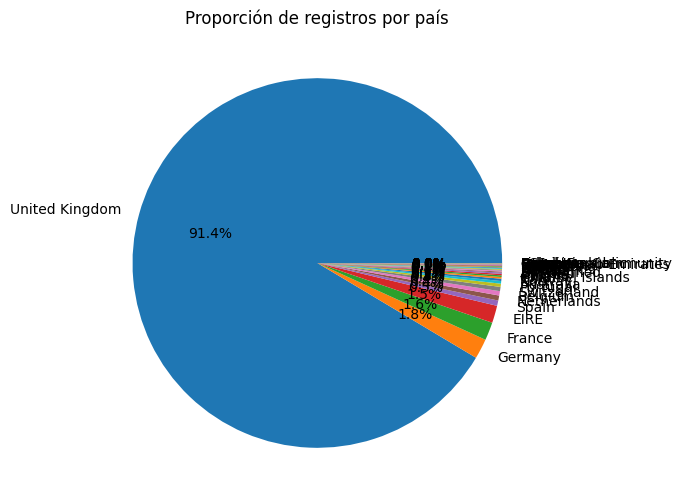

In [17]:
data['Country'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.ylabel('')
plt.title('Proporción de registros por país')
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

In [18]:
data.groupby(data['InvoiceDate'].dt.to_period('M'))['UnitPrice'].mean()

,UnitPrice
InvoiceDate,
2010-12,6.132644
2011-01,4.915151
2011-02,4.599876
2011-03,4.666554
2011-04,4.317588
2011-05,5.149486
2011-06,5.443330
2011-07,4.350088
2011-08,4.262149


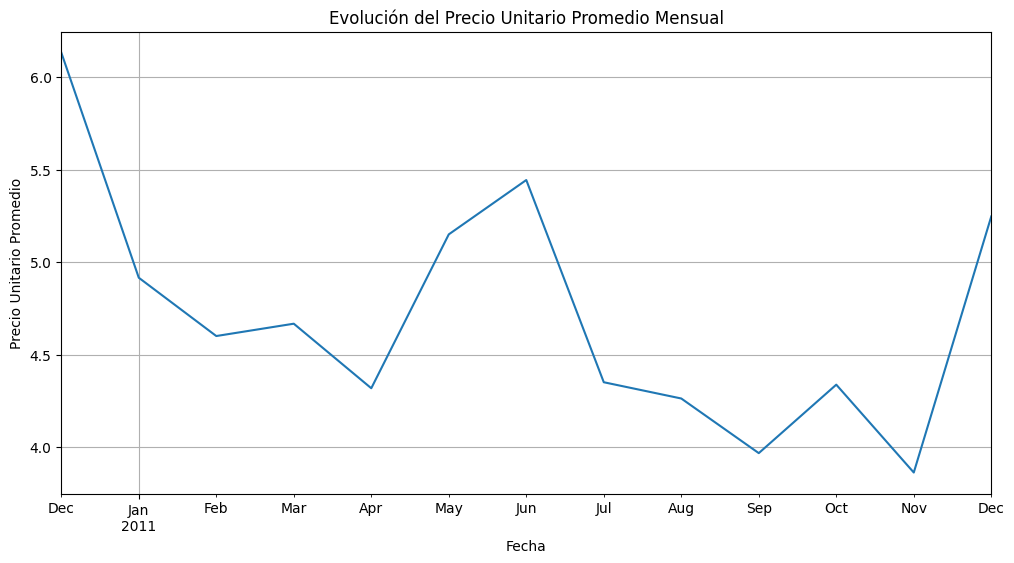

In [20]:
monthly_avg_price = data.groupby(data['InvoiceDate'].dt.to_period('M'))['UnitPrice'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_price.plot(kind='line')
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.xlabel('Fecha')
plt.ylabel('Precio Unitario Promedio')
plt.grid(True)
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

In [ ]:
data.groupby('Description')['Quantity'].value_counts().sort_values(ascending=False).head(5)

,,count
Description,Quantity,
JUMBO BAG RED RETROSPOT,10,724
DOTCOM POSTAGE,1,708
LUNCH BAG RED RETROSPOT,10,632
ASSORTED COLOUR BIRD ORNAMENT,8,610
REGENCY CAKESTAND 3 TIER,1,604


/tmp/ipython-input-2171254896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_descriptions.index, y=top_5_descriptions.values, palette='viridis')


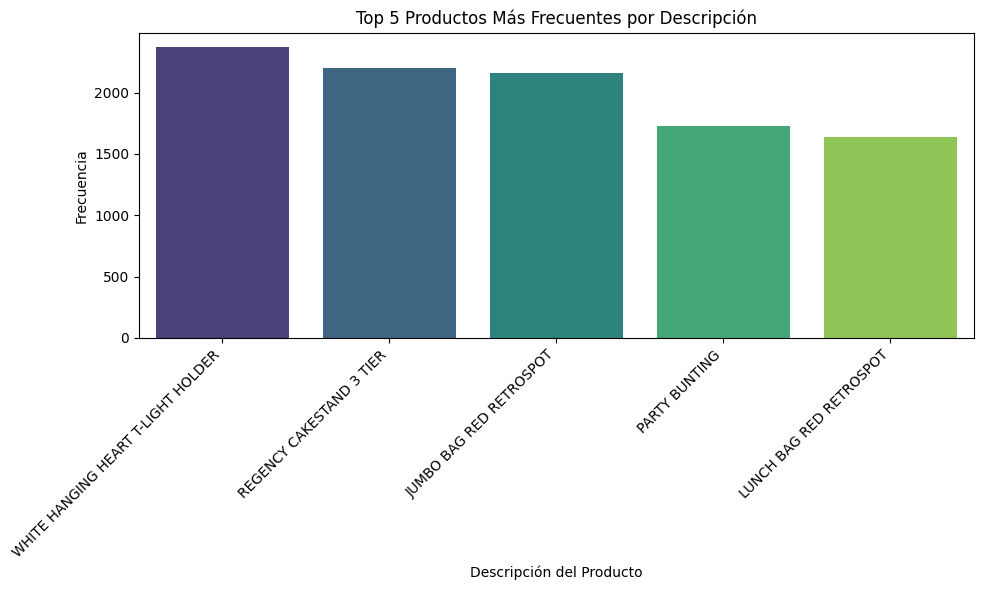

In [ ]:
top_5_descriptions = data['Description'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_descriptions.index, y=top_5_descriptions.values, palette='viridis')
plt.title('Top 5 Productos Más Frecuentes por Descripción')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.